### Anomaly Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.io import loadmat
from sklearn import metrics

In [2]:
def estimate_gaussian(X):
    """
    Estimates the parameters of a Gaussian distribution using the data in X.
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    Returns
    -------
    mu : ndarray, shape (n_feature,)
        The mean of each feature.
    variance : ndarray, shape (n_feature,)
        The variance of each feature.
    """
    mean = []
    variance = []
    for n in range(X.shape[1]):
        mean.append(np.mean(X[:, n]))
        variance.append(np.std(X[:, n])**2)
    return mean, variance

In [3]:
def select_threshold(pval, yval):
    f_1 = []
    eps = []
    the_epsilons = np.linspace(np.min(pval), np.max(pval), 10000)
    for epsilon in the_epsilons:
        pred = np.where((pval[:, 0] < epsilon), (np.where((pval[:, 1] < epsilon), 1, 1)), (np.where((pval[:, 1] < epsilon), 1, 0)))
        eps.append(epsilon)
        f_1.append(metrics.f1_score(yval, pred))
    best_f1 = np.max(f_1)
    best_eps_pos = np.argmax(f_1)
    best_epsilon = eps[best_eps_pos]
    return best_epsilon, best_f1

X.shape:  (307, 2)


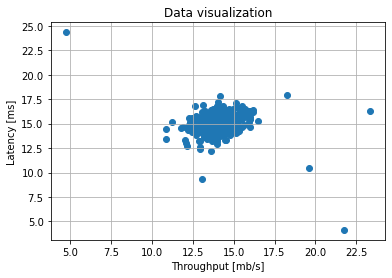

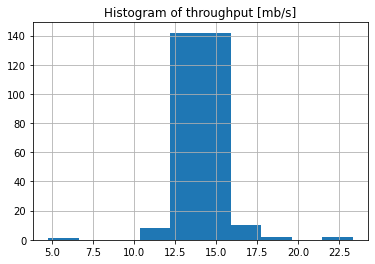

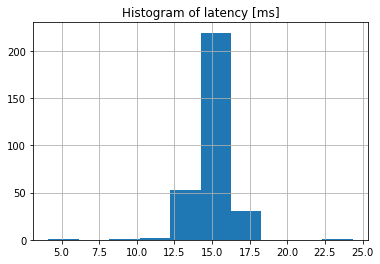

In [4]:
data = loadmat('data.mat')
X = data['X']

print('X.shape: ', X.shape)

plt.scatter(X[:, 0], X[:, 1])
plt.title('Data visualization')
plt.xlabel('Throughput [mb/s]')
plt.ylabel('Latency [ms]')
plt.grid()
plt.show()

plt.hist(X[:, 0])
plt.title('Histogram of throughput [mb/s]')
plt.grid()
plt.show()

plt.hist(X[:, 1])
plt.title('Histogram of latency [ms]')
plt.grid()
plt.show()

In [5]:
Xval = data['Xval']
yval = data['yval']

mean, variance = estimate_gaussian(X)

print('Mean value:', mean,'\nVariance value:', variance)
print('Xval.shape:',Xval.shape, '\nyval.shape:',yval.shape)

gauss = np.zeros(X.shape)
pval = np.zeros(Xval.shape)

for i in range(X.shape[1]):
    gauss[:, i] = stats.norm.pdf(X[:, i], mean[i], np.sqrt(variance[i]))
    pval[:, i] = stats.norm.pdf(Xval[:, i], mean[i], np.sqrt(variance[i]))

best_eps, best_f1 = select_threshold(pval, yval)
print('Best epsilon value:',best_eps, '\nBestest F1 value:',best_f1)

anomaly = np.where(pval < best_eps)
anomaly = list(dict.fromkeys(anomaly[0]))

Mean value: [14.112225783945592, 14.99771050813621] 
Variance value: [1.8326314134945174, 1.7097453308287787]
Xval.shape: (307, 2) 
yval.shape: (307, 1)
Best epsilon value: 0.0003966715195093453 
Bestest F1 value: 0.8750000000000001


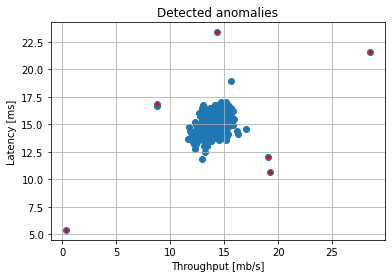

In [6]:
plt.figure()
plt.scatter(Xval[:, 0], Xval[:, 1])
plt.scatter(Xval[anomaly[0]:anomaly[len(anomaly)-1], 0], Xval[anomaly[0]:anomaly[len(anomaly)-1], 1], s=10, color='r')
plt.title('Detected anomalies')
plt.xlabel('Throughput [mb/s]')
plt.ylabel('Latency [ms]')
plt.grid()
plt.show()